In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Load the Dataset and Perform Data Preprocessing

In [2]:

# Load the dataset
url = "adultcensusincome.csv" 
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income'] 
data = pd.read_csv(url, names=columns, na_values=' ?')

# Data Cleaning: Remove rows with missing values
data.dropna(inplace=True)

# Encode categorical variables
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Split data into features and labels
X = data.drop('income', axis=1)
y = data['income']

# Scale the features to standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


### Logistic Regression Model without PCA (Baseline)

In [3]:

# Baseline Model (without PCA)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
accuracy_without_pca = accuracy_score(y_test, y_pred)

print("Logistic Regression without PCA")
print(f"Accuracy: {accuracy_without_pca:.4f}")
print(classification_report(y_test, y_pred))


Logistic Regression without PCA
Accuracy: 0.7881
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7414
           1       0.62      0.32      0.42      2355

    accuracy                           0.79      9769
   macro avg       0.72      0.63      0.64      9769
weighted avg       0.77      0.79      0.76      9769



### Dimensionality Reduction using PCA

In [4]:

# Dimensionality Reduction using PCA
# Applying PCA to transform data while retaining all components
pca_all = PCA()
X_train_pca_all = pca_all.fit_transform(X_train)
X_test_pca_all = pca_all.transform(X_test)

# Logistic Regression with all PCA components
log_reg_pca_all = LogisticRegression()
log_reg_pca_all.fit(X_train_pca_all, y_train)
y_pred_pca_all = log_reg_pca_all.predict(X_test_pca_all)
accuracy_pca_all = accuracy_score(y_test, y_pred_pca_all)

print("\nLogistic Regression with PCA (whole dataset)")
print(f"Accuracy: {accuracy_pca_all:.4f}")
print(classification_report(y_test, y_pred_pca_all))



Logistic Regression with PCA (whole dataset)
Accuracy: 0.7880
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7414
           1       0.62      0.32      0.42      2355

    accuracy                           0.79      9769
   macro avg       0.72      0.63      0.64      9769
weighted avg       0.77      0.79      0.76      9769



In [5]:

# PCA retaining components that explain 50% of variance
pca_50 = PCA(0.5)
X_train_pca_50 = pca_50.fit_transform(X_train)
X_test_pca_50 = pca_50.transform(X_test)

# Logistic Regression on 50% variance PCA components
log_reg_pca_50 = LogisticRegression()
log_reg_pca_50.fit(X_train_pca_50, y_train)
y_pred_pca_50 = log_reg_pca_50.predict(X_test_pca_50)
accuracy_pca_50 = accuracy_score(y_test, y_pred_pca_50)

print("\nLogistic Regression with PCA (variance explained ≥ 0.5)")
print(f"Accuracy: {accuracy_pca_50:.4f}")
print(classification_report(y_test, y_pred_pca_50))



Logistic Regression with PCA (variance explained ≥ 0.5)
Accuracy: 0.7803
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7414
           1       0.59      0.29      0.39      2355

    accuracy                           0.78      9769
   macro avg       0.70      0.61      0.63      9769
weighted avg       0.75      0.78      0.75      9769



In [6]:

# PCA retaining components that explain 75% of variance
pca_75 = PCA(0.75)
X_train_pca_75 = pca_75.fit_transform(X_train)
X_test_pca_75 = pca_75.transform(X_test)

# Logistic Regression on 75% variance PCA components
log_reg_pca_75 = LogisticRegression()
log_reg_pca_75.fit(X_train_pca_75, y_train)
y_pred_pca_75 = log_reg_pca_75.predict(X_test_pca_75)
accuracy_pca_75 = accuracy_score(y_test, y_pred_pca_75)

print("\nLogistic Regression with PCA (variance explained ≥ 0.75)")
print(f"Accuracy: {accuracy_pca_75:.4f}")
print(classification_report(y_test, y_pred_pca_75))



Logistic Regression with PCA (variance explained ≥ 0.75)
Accuracy: 0.7884
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      7414
           1       0.63      0.30      0.41      2355

    accuracy                           0.79      9769
   macro avg       0.72      0.62      0.64      9769
weighted avg       0.77      0.79      0.76      9769



### Visualize Explained Variance by PCA Components

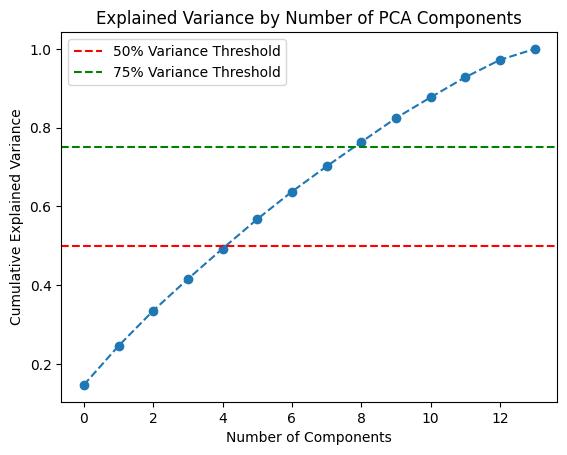

In [7]:

# Visualize Explained Variance
explained_variance = np.cumsum(pca_all.explained_variance_ratio_)
plt.plot(explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.5, color='r', linestyle='--', label='50% Variance Threshold')
plt.axhline(y=0.75, color='g', linestyle='--', label='75% Variance Threshold')
plt.title('Explained Variance by Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend(loc='best')
plt.show()
